<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/Supply_Chain_Game_Simulator_made_by_Pythonash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import math
demand=pd.read_excel('/content/Demand for each destination region..xlsx','Sheet JS')
demand=pd.concat([demand,demand],axis=0)
xx=pd.DataFrame([[0,1]])
xx.columns=demand.columns
data1=pd.concat([xx,demand],axis=0)
data1=data1.reset_index().drop(['index'],axis=1)
data2=data1.copy()
data2['wip']=0
data2['warehouse']=0
data2['shipment']=0
data2['lost_demand']=0
data2['cost']=0
data2['cash']=2738867.06
data2['demand']=0
data2['process']=0
data2['shipping_way']=0
data2['profit']=0

data2=data2.drop(['Calopeia'],axis=1)

data2['demand'] = data1['Calopeia']
last=data2
last['cash'].iloc[1:] = 0
last.to_csv('./last.csv',index=False, encoding='utf-8-sig')
last=pd.read_csv('./last.csv')
last=last.astype('float')
last=last.reset_index().drop(['index'],axis=1)
print(last)
for a,b,c,d,e,f,g,h,i,j,ind in zip(last['day'],last['wip'],last['warehouse'],last['shipment'],last['lost_demand'],last['cost'],last['cash'],last['demand'],last['process'],last['shipping_way'],last.index): 
    ########################case1#############################  
  if (i == 0) &(c == 0):
    print('Current day is ', str(ind)+'.')
    print('case1')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    capa=int(input('Enter current capacity '))
    quantity=int(input('Enter your product quantity'))
    completed_quantity=quantity/capa
    completed_day=math.ceil(quantity/capa)
    last['process'].iloc[ind:ind+completed_day] = 1
    last['process'].iloc[ind+completed_day] = 3
    last['wip'].iloc[ind:ind+completed_day] = quantity
    last['lost_demand'].iloc[ind] = c-h
    revenue = 0
    production_cost = 1500 + 1000 * quantity
    shipping_cost = 0
    holding_cost = 0
    customer_cost = 0
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case2#############################
  if (0 < c < 300) & (i == 0) & (c <= h):
    print('Current day is ', str(ind)+'.')
    print('case2')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    capa=int(input('Enter current capacity '))  
    quantity=int(input('Enter your product quantity'))
    completed_quantity=quantity/capa
    completed_day=math.ceil(quantity/capa)
    last['process'].iloc[ind:ind+completed_day] = 1
    last['process'].iloc[ind+completed_day] = 3
    last['wip'].iloc[ind:ind+completed_day] = quantity
    last['lost_demand'].iloc[ind] = c-h
    revenue = 1450*c
    production_cost = 1500 + 1000 * quantity
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * c
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case3#############################
  if (0 < c < 300) & (i == 0) & (c > h):
    print('Current day is ', str(ind)+'.')
    print('case3')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    capa=int(input('Enter current capacity '))  
    quantity=int(input('Enter your product quantity'))
    completed_quantity=quantity/capa
    completed_day=math.ceil(quantity/capa)
    last['process'].iloc[ind:ind+completed_day] = 1
    last['process'].iloc[ind+completed_day] = 3
    last['wip'].iloc[ind:ind+completed_day] = quantity
    revenue = 1450 * h
    production_cost = 1500 + 1000 * quantity
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * h
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h  + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case4#############################
  if (i == 1) &(c == 0):
    print('Current day is ', str(ind)+'.')
    print('case4')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    last['lost_demand'].iloc[ind] = c-h
    revenue = 0
    production_cost = 0
    shipping_cost = 0
    holding_cost = 0
    customer_cost = 0
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case5#############################
  if (0 < c < 300) & (i == 1) & (c <= h):
    print('Current day is ', str(ind)+'.')
    print('case5')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    last['lost_demand'].iloc[ind] = c-h
    revenue = 1450 * c
    production_cost=0
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * c
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case6#############################
  if (0 < c < 300) & (i == 1) & (c > h):
    print('Current day is ', str(ind)+'.')
    print('case6')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    revenue = h * 1450
    production_cost = 0
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * h
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + c
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case7#############################
  if (i == 3) & (c == 0):
    print('Current day is',str(ind)+'.')
    print('case7')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    capa=int(input('Enter current capacity '))  
    quantity=int(input('Enter your product quantity'))
    completed_quantity=quantity/capa
    completed_day=math.ceil(quantity/capa)
    last['process'].iloc[ind:ind+completed_day] = 1
    last['process'].iloc[ind+completed_day] = 3
    last['wip'].iloc[ind:ind+completed_day] = quantity
    last['lost_demand'].iloc[ind] = c-h
    revenue = 0
    production_cost = 1500 + 1000 * quantity
    holding_cost = 0
    customer_cost = 0
    print('It is time to select your shipping method')
    while True:
      shipping_way=input('Enter your shipping method ')
      if shipping_way == 'truck':
        if last['wip'].iloc[ind-1] <=200:
          print('Your shipping amounts are less than 200.')
          shipping_cost= 15000
        if last['wip'].iloc[ind-1] >200:
          print('Your shipping amounts are greater than 200.')
          shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
        last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
        print('You select your shipping way as a truck.')
        break
      if shipping_way == 'mail':
        print('You select your shipping way as a mail.')
        shipping_cost = 150 * last['wip'].iloc[ind-1]
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
        break
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case8#############################
  if (0< c < 300 ) & (i == 3) & (c <= h):
    print('Current day is',str(ind)+'.')
    print('case8')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    capa=int(input('Enter current capacity '))  
    quantity=int(input('Enter your product quantity'))
    completed_quantity=quantity/capa
    completed_day=math.ceil(quantity/capa)
    last['process'].iloc[ind:ind+completed_day] = 1
    last['process'].iloc[ind+completed_day] = 3
    last['wip'].iloc[ind:ind+completed_day] = quantity
    last['lost_demand'].iloc[ind] = c-h
    revenue = c * 1450
    production_cost = 1500 + 1000 * quantity
    holding_cost = c * 100/365
    customer_cost = c * 150
    print('It is time to select your shipping method')
    while True:
      shipping_way=input('Enter your shipping method')
      if shipping_way == 'truck':
        if last['wip'].iloc[ind-1] <=200:
          print('Your shipping amounts are less than 200.')
          shipping_cost= 15000
        if last['wip'].iloc[ind-1] >200:
          print('Your shipping amounts are greater than 200.')
          shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
        last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
        print('You select your shipping way as a truck.')
        break
      if shipping_way == 'mail':
        print('You select your shipping way as a mail.')
        shipping_cost = 150 * last['wip'].iloc[ind-1]
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
        break
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case9#############################
  if (0 < c < 300 ) & (i == 3) & (c > h):
    print('Current day is',str(ind)+'.')
    print('case9')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    capa=int(input('Enter current capacity '))  
    quantity=int(input('Enter your product quantity'))
    completed_quantity=quantity/capa
    completed_day=math.ceil(quantity/capa)
    last['process'].iloc[ind:ind+completed_day] = 1
    last['process'].iloc[ind+completed_day] = 3
    last['wip'].iloc[ind:ind+completed_day] = quantity
    revenue = h * 1450
    production_cost = 1500 + 1000 * quantity
    holding_cost = c * 100/365
    customer_cost = h * 150
    print('It is time to select your shipping method')
    while True:
      shipping_way=input('Enter your shipping method')
      if shipping_way == 'truck':
        if last['wip'].iloc[ind-1] <=200:
          print('Your shipping amounts are less than 200.')
          shipping_cost= 15000
        if last['wip'].iloc[ind-1] >200:
          print('Your shipping amounts are greater than 200.')
          shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
        last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
        print('You select your shipping way as a truck.')
        break
      if shipping_way == 'mail':
        print('You select your shipping way as a mail.')
        shipping_cost = 150 * last['wip'].iloc[ind-1]
        last['warehouse'].iloc[ind+1:] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
        break
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case10#############################
  if (c >= 300) & (i == 0) & (c <= h):
    print('Current day is ', str(ind)+'.')
    print('case10')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    last['lost_demand'].iloc[ind] = c-h
    revenue = c * 1450
    production_cost = 0
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * c
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case11#############################
  if (c >= 300) & (i == 0) & (c > h):
    print('Current day is ', ind+'.')
    print('case11')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    revenue = h * 1450
    production_cost = 0
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * h
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case12#############################
  if (c >= 300) & (i == 1) & (c <= h):
    print('Current day is ', str(ind)+'.')
    print('case12')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    last['lost_demand'].iloc[ind] = c-h
    revenue = c * 1450
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * c
    production_cost = 0
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case13#############################
  if (c >= 300) & (i == 1) & (c > h):
    print('Current day is ', str(ind)+'.')
    print('case13')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    revenue = h * 1450
    shipping_cost = 0
    holding_cost = c * 100/365
    customer_cost = 150 * h
    production_cost = 0
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case14#############################
  if (c >= 300 ) & (i == 3) & (c <= h):
    print('Current day is',str(ind)+'.')
    print('case14')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    last['lost_demand'].iloc[ind] = c-h
    revenue = c * 1450
    holding_cost = c * 100/365
    customer_cost = c * 150
    production_cost = 0
    print('It is time to select your shipping method')
    while True:
      shipping_way=input('Enter your shipping method')
      if shipping_way == 'truck':
        if last['wip'].iloc[ind-1] <=200:
          print('Your shipping amounts are less than 200.')
          shipping_cost= 15000
        if last['wip'].iloc[ind-1] >200:
          print('Your shipping amounts are greater than 200.')
          shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
        last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
        print('You select your shipping way as a truck.')
        break
      if shipping_way == 'mail':
        print('You select your shipping way as a mail.')
        shipping_cost = 150 * last['wip'].iloc[ind-1]
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
        break
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()
    ########################case15#############################
  if (c >= 300 ) & (i == 3) & (c > h):
    print('Current day is',str(ind)+'.')
    print('case15')
    print('current cash:',last['cash'].iloc[ind])
    print('process status:',i)
    print('warehouse is:',c)
    revenue = h * 1450
    holding_cost = c * 100/365
    customer_cost = h * 150
    production_cost = 0
    print('It is time to select your shipping method')
    while True:
      shipping_way=input('Enter your shipping method')
      if shipping_way == 'truck':
        if last['wip'].iloc[ind-1] <=200:
          print('Your shipping amounts are less than 200.')
          shipping_cost= 15000
        if last['wip'].iloc[ind-1] >200:
          print('Your shipping amounts are greater than 200.')
          shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
        last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
        print('You select your shipping way as a truck.')
        break
      if shipping_way == 'mail':
        print('You select your shipping way as a mail.')
        shipping_cost = 150 * last['wip'].iloc[ind-1]
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
        break
    total_cost=production_cost + shipping_cost + holding_cost + customer_cost
    last['profit'].iloc[ind] = revenue
    last['cost'].iloc[ind] = total_cost
    last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
    last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
    print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
    print()
    print()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


          cash  profit  cost  warehouse    wip
1   2437367.06     0.0   0.0        0.0  300.0
2   2437367.06     0.0   0.0        0.0  300.0
3         0.00     0.0   0.0        0.0  300.0
4         0.00     0.0   0.0        0.0  300.0
5         0.00     0.0   0.0        0.0  300.0
6         0.00     0.0   0.0        0.0  300.0
7         0.00     0.0   0.0        0.0  300.0
8         0.00     0.0   0.0        0.0    0.0
9         0.00     0.0   0.0        0.0    0.0
10        0.00     0.0   0.0        0.0    0.0


Current day is  2.
case4
current capa: 40.0
current quantity 300.0
current reorder_point 400.0
current shipping method truck
current cash: 2437367.06
current process status: 1.0
current warehouse is: 0.0
          cash  profit  cost  warehouse    wip
2   2437367.06     0.0   0.0        0.0  300.0
3   2437367.06     0.0   0.0        0.0  300.0
4         0.00     0.0   0.0        0.0  300.0
5         0.00     0.0   0.0        0.0  300.0
6         0.00     0.0   0.0        0.0  3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


          cash  profit  cost  warehouse    wip
1   2587367.06     0.0   0.0        0.0  150.0
2   2587367.06     0.0   0.0        0.0  150.0
3         0.00     0.0   0.0        0.0    0.0
4         0.00     0.0   0.0        0.0    0.0
5         0.00     0.0   0.0        0.0    0.0
6         0.00     0.0   0.0        0.0    0.0
7         0.00     0.0   0.0        0.0    0.0
8         0.00     0.0   0.0        0.0    0.0
9         0.00     0.0   0.0        0.0    0.0
10        0.00     0.0   0.0        0.0    0.0


Current day is  2.
case4
current capa: 50.0
current quantity 150.0
current reorder_point 100.0
current shipping method truck
current cash: 2587367.06
current process status: 1.0
current warehouse is: 0.0
          cash  profit  cost  warehouse    wip
2   2587367.06     0.0   0.0        0.0  150.0
3   2587367.06     0.0   0.0        0.0    0.0
4         0.00     0.0   0.0        0.0    0.0
5         0.00     0.0   0.0        0.0    0.0
6         0.00     0.0   0.0        0.0   

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Current day is  3.
case4
current capa: 40.0
current quantity 250.0
current reorder_point 200.0
current shipping method mail
current cash: 2487367.06
current process status: 1.0
current warehouse is: 0.0
          cash  profit  cost  warehouse    wip
3   2487367.06     0.0   0.0        0.0  250.0
4   2487367.06     0.0   0.0        0.0  250.0
5         0.00     0.0   0.0        0.0  250.0
6         0.00     0.0   0.0        0.0  250.0
7         0.00     0.0   0.0        0.0    0.0
8         0.00     0.0   0.0        0.0    0.0
9         0.00     0.0   0.0        0.0    0.0
10        0.00     0.0   0.0        0.0    0.0
11        0.00     0.0   0.0        0.0    0.0
12        0.00     0.0   0.0        0.0    0.0


Current day is  4.
case4
current capa: 40.0
current quantity 250.0
current reorder_point 200.0
current shipping method mail
current cash: 2487367.06
current process status: 1.0
current warehouse is: 0.0
          cash  profit  cost  warehouse    wip
4   2487367.06     0.0   0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


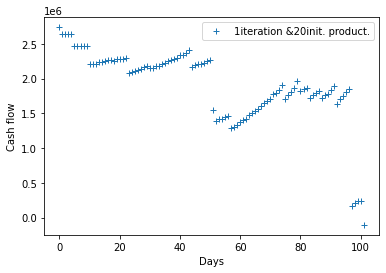

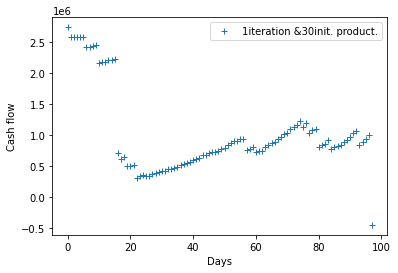

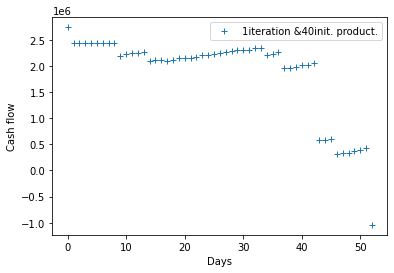

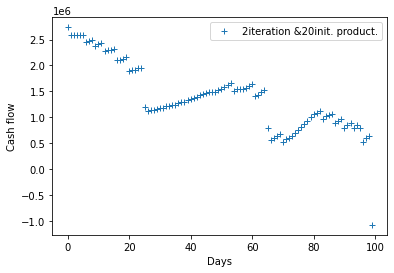

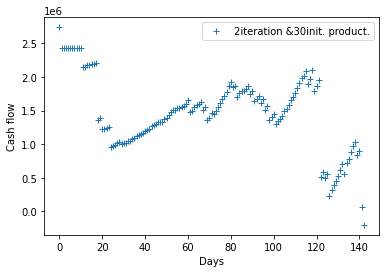

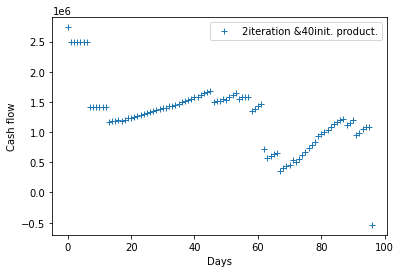

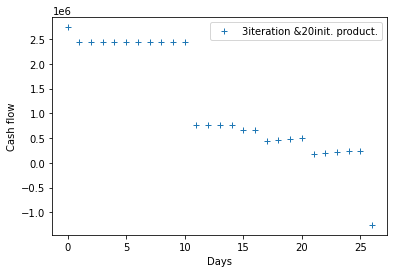

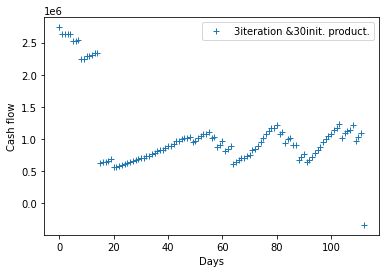

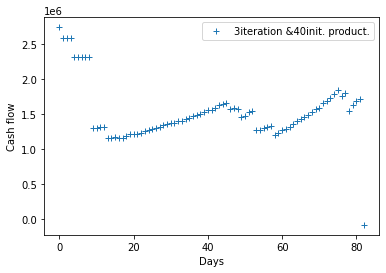

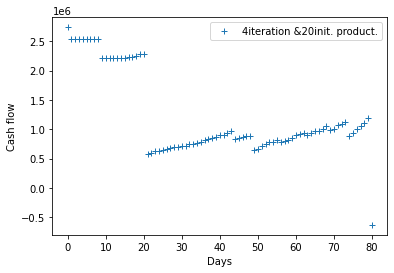

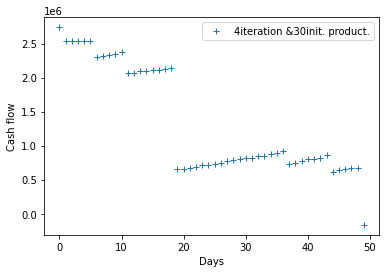

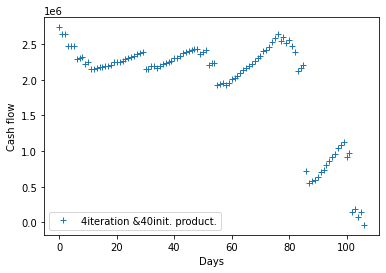

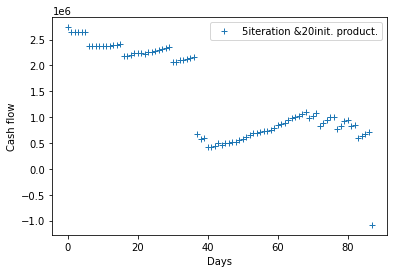

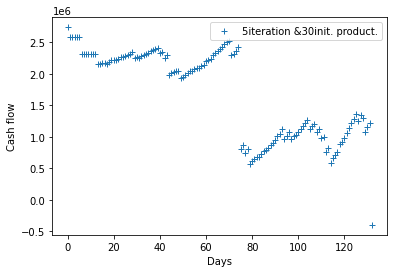

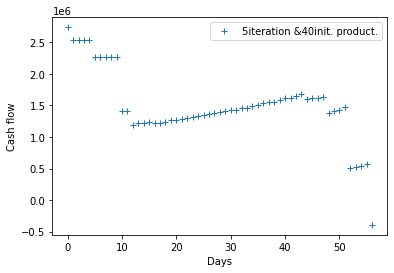

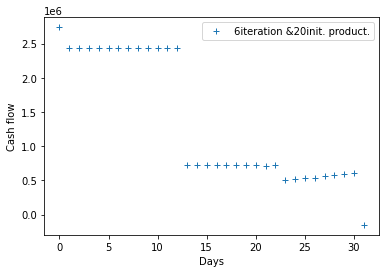

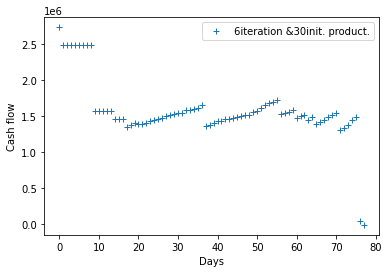

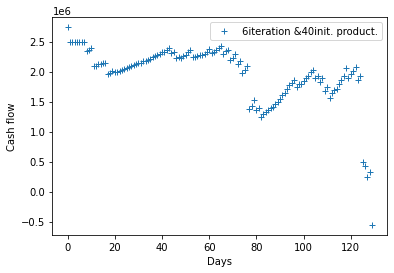

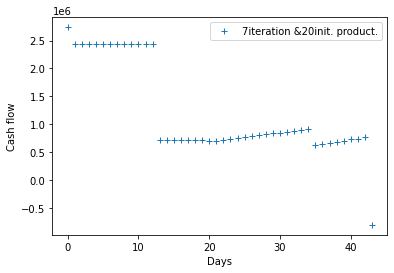

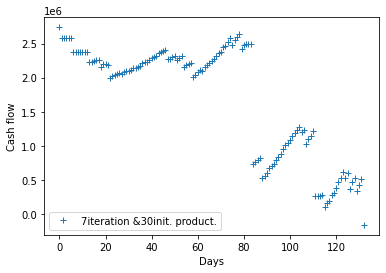

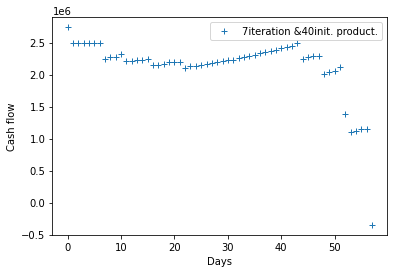

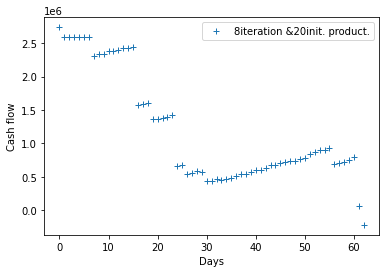

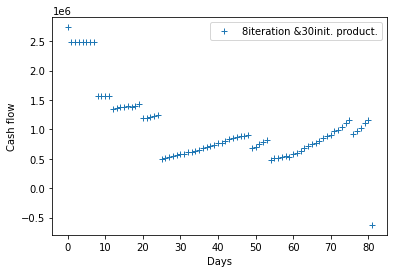

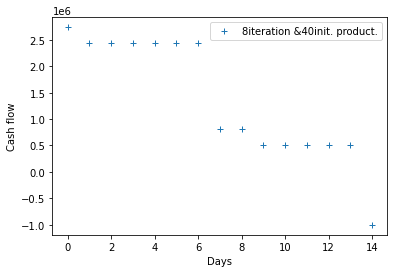

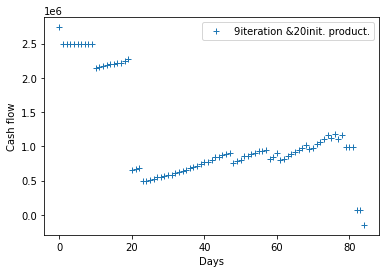

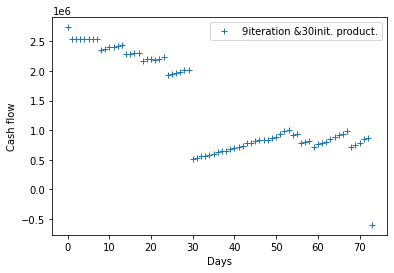

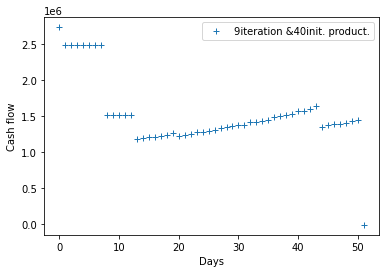

In [38]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
# demand=pd.read_excel('/content/Demand for each destination region..xlsx','Sheet JS')
# demand=pd.concat([demand,demand],axis=0)
# xx=pd.DataFrame([[0,1]])
# xx.columns=demand.columns
# data1=pd.concat([xx,demand],axis=0)
# data1=data1.reset_index().drop(['index'],axis=1)
# data2=data1.copy()
# data2['wip']=0
# data2['warehouse']=0
# data2['shipment']=0
# data2['lost_demand']=0
# data2['cost']=0
# data2['cash']=2738867.06
# data2['demand']=0
# data2['process']=0
# data2['shipping_way']=0
# data2['profit']=0

# data2=data2.drop(['Calopeia'],axis=1)

# data2['demand'] = data1['Calopeia']
# last=data2
# last['cash'].iloc[1:] = 0
# last.to_csv('./last.csv',index=False, encoding='utf-8-sig')
# last=pd.read_csv('./last.csv')
# last=last.astype('float')
# last=last.reset_index().drop(['index'],axis=1)
# print(last)
# total_production_parameter =[100,150,200,250,300]
# shipping_method_parameter=['truck','mail']
# reorder_point_parameter=[100,150,200,250,300,350,400]
# capa_surplus_parameter = [0 , 5, 10]
for iteration in np.arange(1,10):
  for initial_production in [20,30,40]:
    capa=initial_production
    demand=pd.read_excel('/content/Demand for each destination region..xlsx','Sheet JS')
    demand=pd.concat([demand,demand],axis=0)
    xx=pd.DataFrame([[0,1]])
    xx.columns=demand.columns
    data1=pd.concat([xx,demand],axis=0)
    data1=data1.reset_index().drop(['index'],axis=1)
    data2=data1.copy()
    data2['wip']=0
    data2['warehouse']=0
    data2['shipment']=0
    data2['lost_demand']=0
    data2['cost']=0
    data2['cash']=2738867.06
    data2['demand']=0
    data2['process']=0
    data2['shipping_way']=0
    data2['profit']=0

    data2=data2.drop(['Calopeia'],axis=1)

    data2['demand'] = data1['Calopeia']
    last=data2
    last['cash'].iloc[1:] = 0
    last.to_csv('./last.csv',index=False, encoding='utf-8-sig')
    last=pd.read_csv('./last.csv')
    last=last.astype('float')
    last=last.reset_index().drop(['index'],axis=1)
    print(last)
    total_production_parameter =[100,150,200,250,300]
    shipping_method_parameter=['truck','mail']
    reorder_point_parameter=[100,150,200,250,300,350,400]
    capa_surplus_parameter = [0 , 5, 10]
    for a,b,c,d,e,f,g,h,i,j,ind in zip(last['day'],last['wip'],last['warehouse'],last['shipment'],last['lost_demand'],last['cost'],last['cash'],last['demand'],last['process'],last['shipping_way'],last.index): 
      total_production = float(random.choice(total_production_parameter))
      shipping_method = str(random.choice(shipping_method_parameter))
      reorder_point = float(random.choice(reorder_point_parameter))
      daily_production = capa + float(random.choice(capa_surplus_parameter))
        ########################case1#############################  
      if (i == 0) &(c == 0):
        print('Current day is ', str(ind)+'.')
        print('case1')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = 0
        production_cost = 1500 + 1000 * quantity
        shipping_cost = 0
        holding_cost = 0
        customer_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case2#############################
      if (0 < c < reorder_point) & (i == 0) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case2')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = 1450*c
        production_cost = 1500 + 1000 * quantity
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case3#############################
      if (0 < c < reorder_point) & (i == 0) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case3')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        revenue = 1450 * h
        production_cost = 1500 + 1000 * quantity
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h  + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case4#############################
      if (i == 1) &(c == 0):
        print('Current day is ', str(ind)+'.')
        print('case4')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = 0
        production_cost = 0
        shipping_cost = 0
        holding_cost = 0
        customer_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case5#############################
      if (0 < c < reorder_point) & (i == 1) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case5')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = 1450 * c
        production_cost=0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case6#############################
      if (0 < c < reorder_point) & (i == 1) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case6')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        production_cost = 0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + c
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case7#############################
      if (i == 3) & (c == 0):
        print('Current day is',str(ind)+'.')
        print('case7')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = 0
        production_cost = 1500 + 1000 * quantity
        holding_cost = 0
        customer_cost = 0
        print('It is time to select your shipping method')
        while True:
          shipping_way=shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case8#############################
      if (0< c < reorder_point ) & (i == 3) & (c <= h):
        print('Current day is',str(ind)+'.')
        print('case8')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        production_cost = 1500 + 1000 * quantity
        holding_cost = c * 100/365
        customer_cost = c * 150
        print('It is time to select your shipping method')
        while True:
          shipping_way=shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case9#############################
      if (0 < c < reorder_point ) & (i == 3) & (c > h):
        print('Current day is',str(ind)+'.')
        print('case9')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        revenue = h * 1450
        production_cost = 1500 + 1000 * quantity
        holding_cost = c * 100/365
        customer_cost = h * 150
        print('It is time to select your shipping method')
        while True:
          shipping_way= shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case10#############################
      if (c >= reorder_point) & (i == 0) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case10')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        production_cost = 0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case11#############################
      if (c >= reorder_point) & (i == 0) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case11')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        production_cost = 0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case12#############################
      if (c >= reorder_point) & (i == 1) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case12')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        production_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case13#############################
      if (c >= reorder_point) & (i == 1) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case13')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        production_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case14#############################
      if (c >= reorder_point ) & (i == 3) & (c <= h):
        print('Current day is',str(ind)+'.')
        print('case14')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        holding_cost = c * 100/365
        customer_cost = c * 150
        production_cost = 0
        print('It is time to select your shipping method')
        while True:
          shipping_way= shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case15#############################
      if (c >= reorder_point ) & (i == 3) & (c > h):
        print('Current day is', str(ind)+'.')
        print('case15')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        holding_cost = c * 100/365
        customer_cost = h * 150
        production_cost = 0
        print('It is time to select your shipping method')
        while True:
          shipping_way=shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case stop#############################
        ########################end of days#############################
      if ind == 731:
        plt.figure()
        plt.xlabel('Days')
        plt.ylabel('Cash flow')
        plt.plot(last.index[:731], last['cash'].iloc[:731], '+', label=str(iteration)+'iteration &'+str(initial_production)+'init. product.')
        plt.legend()
        print('This iteration is', iteration)
        print('The total cash of',str(initial_production)+'initial production', 'is', last['cash'].iloc[ind])
        last.to_csv('./'+str(iteration)+'_'+str(initial_production)+'_log.csv',index=False,encoding='utf-8-sig')
        break
        ########################bankruptcy#############################
      if last['cash'].iloc[ind] <0:
        print('bankruptcy !!')
        plt.figure()
        plt.xlabel('Days')
        plt.ylabel('Cash flow')
        plt.plot(last.index[:ind+1], last['cash'].iloc[:ind+1], '+', label=str(iteration)+'iteration &'+str(initial_production)+'init. product.')
        plt.legend()
        break

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


        day  wip  warehouse  shipment  ...  demand  process  shipping_way  profit
0       0.0  0.0        0.0       0.0  ...     1.0      0.0           0.0     0.0
1       1.0  0.0        0.0       0.0  ...    11.0      0.0           0.0     0.0
2       2.0  0.0        0.0       0.0  ...     7.0      0.0           0.0     0.0
3       3.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
4       4.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
...     ...  ...        ...       ...  ...     ...      ...           ...     ...
1456  726.0  0.0        0.0       0.0  ...    17.0      0.0           0.0     0.0
1457  727.0  0.0        0.0       0.0  ...     2.0      0.0           0.0     0.0
1458  728.0  0.0        0.0       0.0  ...     8.0      0.0           0.0     0.0
1459  729.0  0.0        0.0       0.0  ...     4.0      0.0           0.0     0.0
1460  730.0  0.0        0.0       0.0  ...    10.0      0.0           0.0     0.0

[1461 rows x 11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:590: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


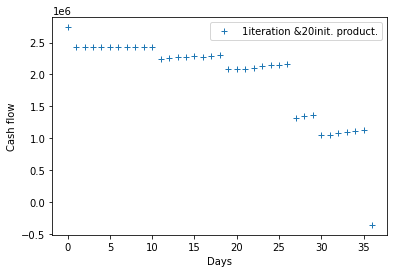

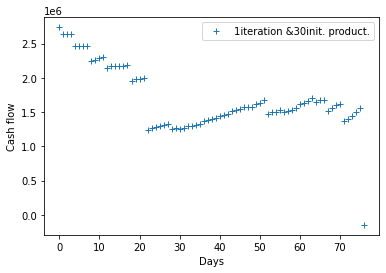

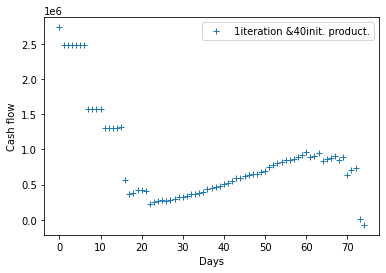

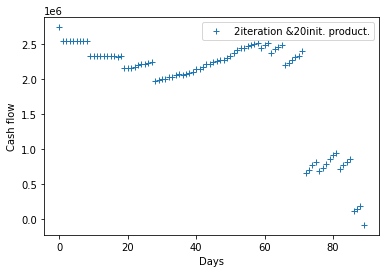

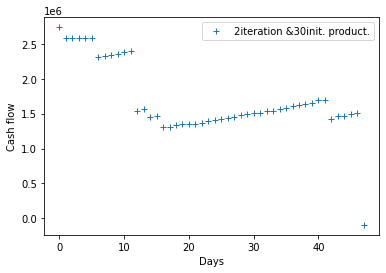

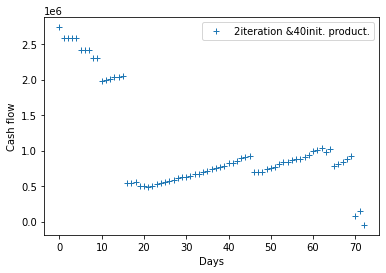

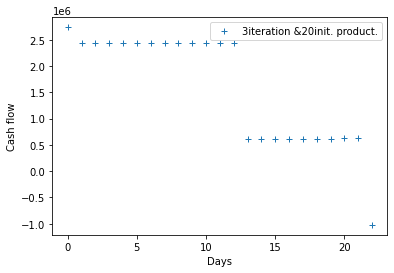

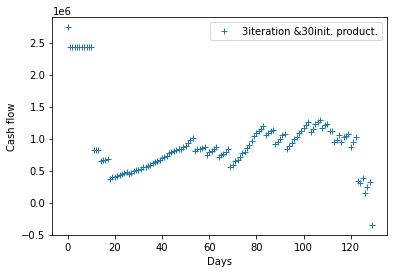

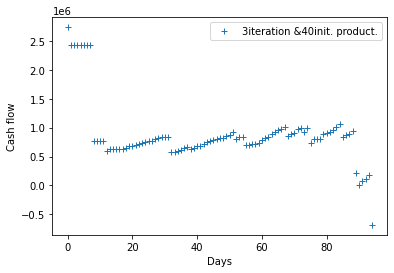

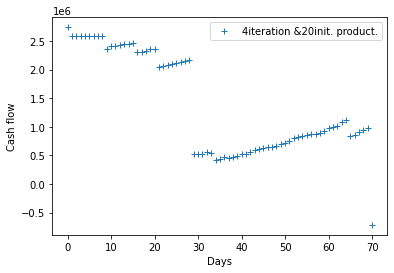

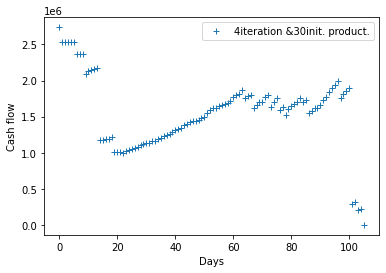

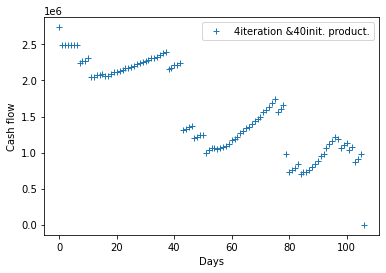

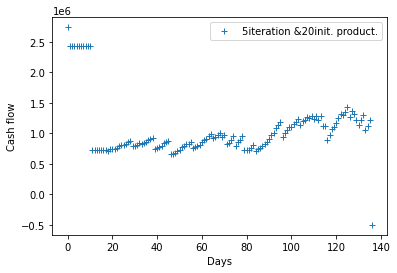

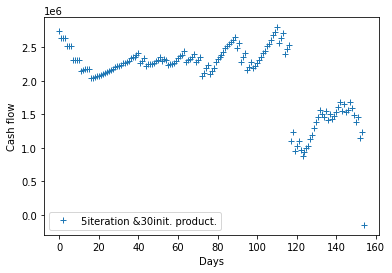

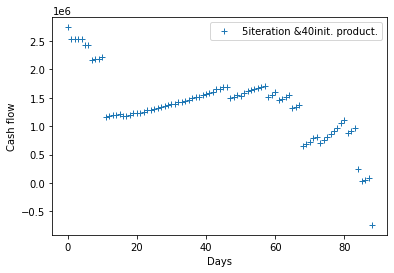

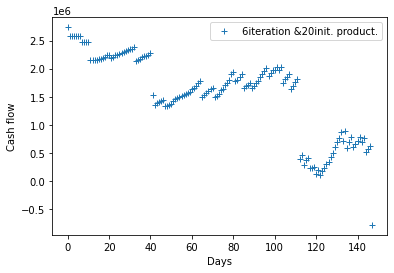

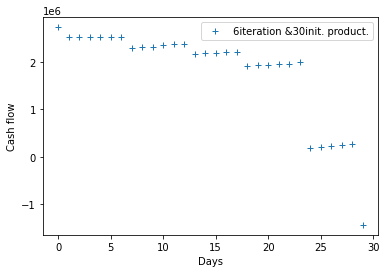

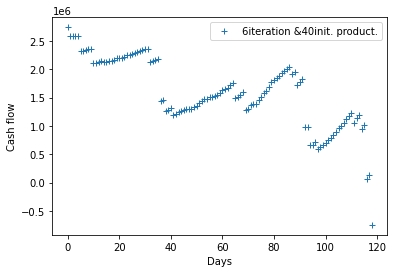

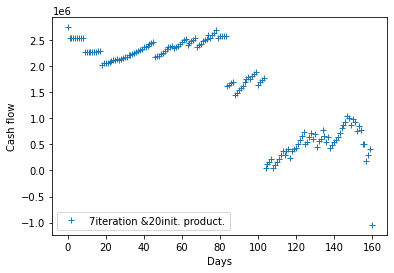

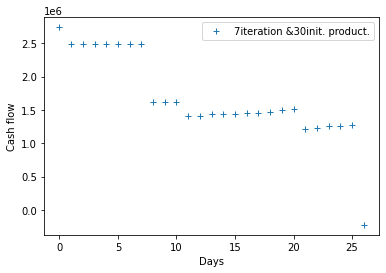

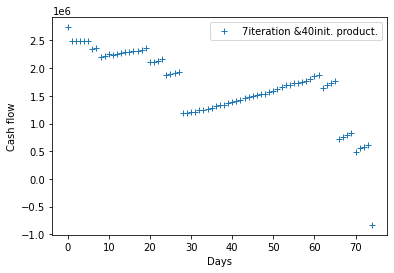

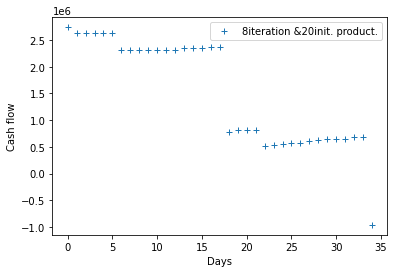

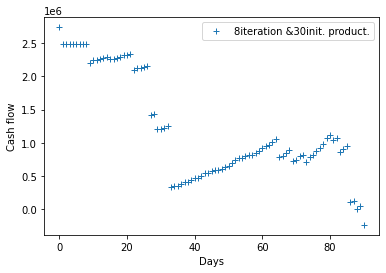

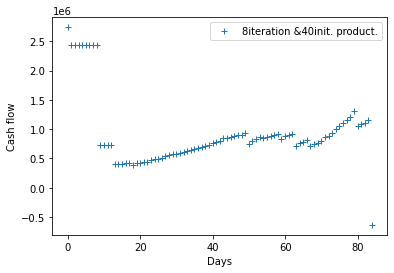

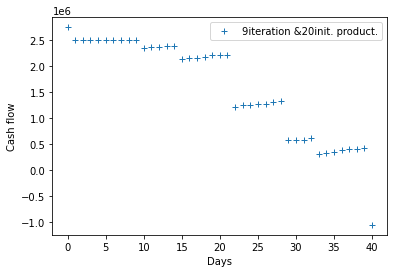

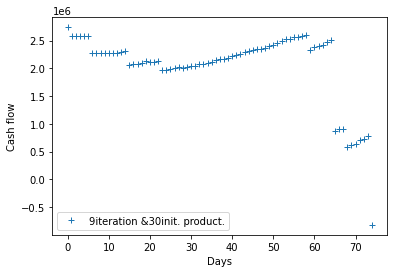

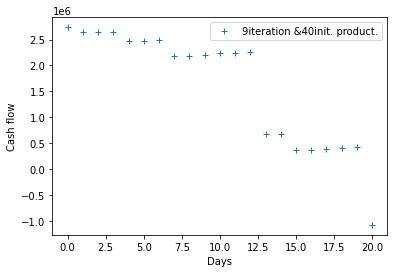

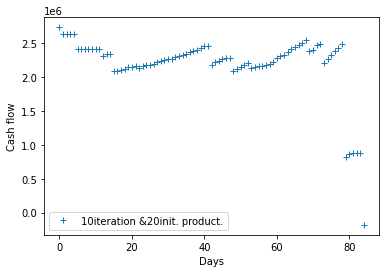

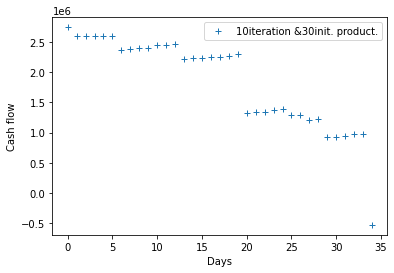

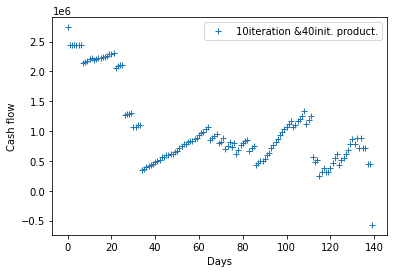

In [40]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
# demand=pd.read_excel('/content/Demand for each destination region..xlsx','Sheet JS')
# demand=pd.concat([demand,demand],axis=0)
# xx=pd.DataFrame([[0,1]])
# xx.columns=demand.columns
# data1=pd.concat([xx,demand],axis=0)
# data1=data1.reset_index().drop(['index'],axis=1)
# data2=data1.copy()
# data2['wip']=0
# data2['warehouse']=0
# data2['shipment']=0
# data2['lost_demand']=0
# data2['cost']=0
# data2['cash']=2738867.06
# data2['demand']=0
# data2['process']=0
# data2['shipping_way']=0
# data2['profit']=0

# data2=data2.drop(['Calopeia'],axis=1)

# data2['demand'] = data1['Calopeia']
# last=data2
# last['cash'].iloc[1:] = 0
# last.to_csv('./last.csv',index=False, encoding='utf-8-sig')
# last=pd.read_csv('./last.csv')
# last=last.astype('float')
# last=last.reset_index().drop(['index'],axis=1)
# print(last)
# total_production_parameter =[100,150,200,250,300]
# shipping_method_parameter=['truck','mail']
# reorder_point_parameter=[100,150,200,250,300,350,400]
# capa_surplus_parameter = [0 , 5, 10]
for iteration in np.arange(1,11):
  for initial_production in [20,30,40]:
    capa=initial_production
    demand=pd.read_excel('/content/Demand for each destination region..xlsx','Sheet JS')
    demand=pd.concat([demand,demand],axis=0)
    xx=pd.DataFrame([[0,1]])
    xx.columns=demand.columns
    data1=pd.concat([xx,demand],axis=0)
    data1=data1.reset_index().drop(['index'],axis=1)
    data2=data1.copy()
    data2['wip']=0
    data2['warehouse']=0
    data2['shipment']=0
    data2['lost_demand']=0
    data2['cost']=0
    data2['cash']=2738867.06
    data2['demand']=0
    data2['process']=0
    data2['shipping_way']=0
    data2['profit']=0

    data2=data2.drop(['Calopeia'],axis=1)

    data2['demand'] = data1['Calopeia']
    last=data2
    last['cash'].iloc[1:] = 0
    last.to_csv('./last.csv',index=False, encoding='utf-8-sig')
    last=pd.read_csv('./last.csv')
    last=last.astype('float')
    last=last.reset_index().drop(['index'],axis=1)
    print(last)
    total_production_parameter =[100,150,200,250,300]
    shipping_method_parameter=['truck','mail']
    reorder_point_parameter=[100,150,200,250,300,350,400]
    capa_surplus_parameter = [0 , 5, 10]
    for a,b,c,d,e,f,g,h,i,j,ind in zip(last['day'],last['wip'],last['warehouse'],last['shipment'],last['lost_demand'],last['cost'],last['cash'],last['demand'],last['process'],last['shipping_way'],last.index): 
      total_production = float(random.choice(total_production_parameter))
      shipping_method = str(random.choice(shipping_method_parameter))
      reorder_point = float(random.choice(reorder_point_parameter))
      daily_production = capa + float(random.choice(capa_surplus_parameter))
        ########################case1#############################  
      if (i == 0) &(c == 0):
        print('Current day is ', str(ind)+'.')
        print('case1')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = 0
        production_cost = 1500 + 1000 * quantity
        shipping_cost = 0
        holding_cost = 0
        customer_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case2#############################
      if (0 < c < reorder_point) & (i == 0) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case2')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = 1450*c
        production_cost = 1500 + 1000 * quantity
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case3#############################
      if (0 < c < reorder_point) & (i == 0) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case3')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        revenue = 1450 * h
        production_cost = 1500 + 1000 * quantity
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h  + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case4#############################
      if (i == 1) &(c == 0):
        print('Current day is ', str(ind)+'.')
        print('case4')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = 0
        production_cost = 0
        shipping_cost = 0
        holding_cost = 0
        customer_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case5#############################
      if (0 < c < reorder_point) & (i == 1) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case5')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = 1450 * c
        production_cost=0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case6#############################
      if (0 < c < reorder_point) & (i == 1) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case6')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        production_cost = 0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + c
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case7#############################
      if (i == 3) & (c == 0):
        print('Current day is',str(ind)+'.')
        print('case7')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = 0
        production_cost = 1500 + 1000 * quantity
        holding_cost = 0
        customer_cost = 0
        print('It is time to select your shipping method')
        while True:
          shipping_way=shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case8#############################
      if (0< c < reorder_point ) & (i == 3) & (c <= h):
        print('Current day is',str(ind)+'.')
        print('case8')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        production_cost = 1500 + 1000 * quantity
        holding_cost = c * 100/365
        customer_cost = c * 150
        print('It is time to select your shipping method')
        while True:
          shipping_way=shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case9#############################
      if (0 < c < reorder_point ) & (i == 3) & (c > h):
        print('Current day is',str(ind)+'.')
        print('case9')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        capa=daily_production # daily_production parameter  
        quantity=total_production # total_production parameter
        completed_quantity=quantity/capa
        completed_day=math.ceil(quantity/capa)
        last['process'].iloc[ind:ind+completed_day] = 1
        last['process'].iloc[ind+completed_day] = 3
        last['wip'].iloc[ind:ind+completed_day] = quantity
        revenue = h * 1450
        production_cost = 1500 + 1000 * quantity
        holding_cost = c * 100/365
        customer_cost = h * 150
        print('It is time to select your shipping method')
        while True:
          shipping_way= shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case10#############################
      if (c >= reorder_point) & (i == 0) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case10')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        production_cost = 0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case11#############################
      if (c >= reorder_point) & (i == 0) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case11')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        production_cost = 0
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case12#############################
      if (c >= reorder_point) & (i == 1) & (c <= h):
        print('Current day is ', str(ind)+'.')
        print('case12')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * c
        production_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case13#############################
      if (c >= reorder_point) & (i == 1) & (c > h):
        print('Current day is ', str(ind)+'.')
        print('case13')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        shipping_cost = 0
        holding_cost = c * 100/365
        customer_cost = 150 * h
        production_cost = 0
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case14#############################
      if (c >= reorder_point ) & (i == 3) & (c <= h):
        print('Current day is',str(ind)+'.')
        print('case14')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        last['lost_demand'].iloc[ind] = c-h
        revenue = c * 1450
        holding_cost = c * 100/365
        customer_cost = c * 150
        production_cost = 0
        print('It is time to select your shipping method')
        while True:
          shipping_way= shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - c + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case15#############################
      if (c >= reorder_point ) & (i == 3) & (c > h):
        print('Current day is', str(ind)+'.')
        print('case15')
        print('current capa:', capa)
        print('current quantity', quantity)
        print('current reorder_point', reorder_point)
        print('current shipping method', shipping_method)
        print('current cash:',last['cash'].iloc[ind])
        print('current process status:',i)
        print('current warehouse is:',c)
        revenue = h * 1450
        holding_cost = c * 100/365
        customer_cost = h * 150
        production_cost = 0
        print('It is time to select your shipping method')
        while True:
          shipping_way=shipping_method # shipping_method
          if shipping_way == 'truck':
            if last['wip'].iloc[ind-1] <=200:
              print('Your shipping amounts are less than 200.')
              shipping_cost= 15000
            if last['wip'].iloc[ind-1] >200:
              print('Your shipping amounts are greater than 200.')
              shipping_cost= 15000 * (last['wip'].iloc[ind-1] // 200 + math.ceil(last['wip'].iloc[ind-1] % 200))
            last['warehouse'].iloc[ind+7] =last['warehouse'].iloc[ind+7] + last['wip'].iloc[ind-1]
            print('You select your shipping way as a truck.')
            break
          if shipping_way == 'mail':
            print('You select your shipping way as a mail.')
            shipping_cost = 150 * last['wip'].iloc[ind-1]
            last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] + last['wip'].iloc[ind-1]
            break
        total_cost=production_cost + shipping_cost + holding_cost + customer_cost
        last['profit'].iloc[ind] = revenue
        last['cost'].iloc[ind] = total_cost
        last['cash'].iloc[ind+1] = last['cash'].iloc[ind] - total_cost + revenue
        last['warehouse'].iloc[ind+1] = last['warehouse'].iloc[ind+1] - h + last['warehouse'].iloc[ind]
        print(last[['cash','profit','cost','warehouse','wip']][ind:ind+10])
        print()
        print()
        ########################case stop#############################
        ########################end of days#############################
      if ind == 731:
        plt.figure()
        plt.xlabel('Days')
        plt.ylabel('Cash flow')
        plt.plot(last.index[:731], last['cash'].iloc[:731], '+', label=str(iteration)+'iteration &'+str(initial_production)+'init. product.')
        plt.legend()
        print('This iteration is', iteration)
        print('The total cash of',str(initial_production)+'initial production', 'is', last['cash'].iloc[ind])
        last.to_csv('./'+str(iteration)+'_'+str(initial_production)+'_log.csv',index=False,encoding='utf-8-sig')
        plt.savefig('./'+str(iteration)+'_'+str(initial_production)+'_log.png')
        break
        ########################bankruptcy#############################
      if last['cash'].iloc[ind] <0:
        print('bankruptcy !!')
        plt.figure()
        plt.xlabel('Days')
        plt.ylabel('Cash flow')
        plt.plot(last.index[:ind+1], last['cash'].iloc[:ind+1], '+', label=str(iteration)+'iteration &'+str(initial_production)+'init. product.')
        last.to_csv('./bankruptcy_'+str(iteration)+'_'+str(initial_production)+'_log.csv',index=False,encoding='utf-8-sig')
        plt.savefig('./bankruptcy_'+str(iteration)+'_'+str(initial_production)+'_log.png')
        plt.legend()
        break